<a href="https://colab.research.google.com/github/Samantha996/Machine-Learning/blob/main/Sentiment_Analysis_with_Vader.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install bS4
!pip install nltk


In [2]:
from urllib.request import urlopen, Request
from bs4 import BeautifulSoup
import pandas as pd
import matplotlib.pyplot as plt
from nltk.sentiment.vader import SentimentIntensityAnalyzer

finviz_url = 'https://www.finviz.com/quote.ashx?t='

/usr/local/lib/python3.7/dist-packages/nltk/twitter/__init__.py:20: UserWarning: The twython library has not been installed. Some functionality from the twitter package will not be available.
  warnings.warn("The twython library has not been installed. "


In [13]:
news_tables = {}
tickers = ['AMZN', 'TSLA', 'FB']

for ticker in tickers:
  url = finviz_url + ticker

  req = Request(url=url, headers={'user-agent':'app1/0.0.1'})
  response = urlopen(req)
  
  html = BeautifulSoup(response, features ='html.parser')
  news_table = html.find(id='news-table')                  
  news_tables[ticker] = news_table
 
#amzn_data = news_tables['AMZN']
#amzn_rows = amzn_data.findAll('tr') #list of all elements inside HTML objects

#for i, row in enumerate(amzn_rows):
 # title = row.a.text
  #td_text = row.td.text
  #print(title)
  #print(td_text)

In [14]:
from datetime import date
parsed_data = []

for ticker, news_table in news_tables.items():

  for row in news_table.findAll('tr'):
    title = row.a.get_text()
    date_data = row.td.text.split(' ') #split based on space

    if len(date_data) == 1:
      time = date_data[0]
    else:
      date = date_data[0]
      time = date_data[1]
    
    parsed_data.append([ticker, date, time, title])

print(parsed_data)

[['AMZN', 'Feb-25-21', '10:00PM\xa0\xa0', '1 Green Flag for Teladoc Health'], ['AMZN', 'Feb-25-21', '06:00PM\xa0\xa0', 'What Are the Risks for Moderna Shareholders?'], ['AMZN', 'Feb-25-21', '04:05PM\xa0\xa0', 'ViacomCBS To Take On Streaming Video Rivals With Paramount+, Other Services'], ['AMZN', 'Feb-25-21', '04:04PM\xa0\xa0', "Plug Power Reports Steep Negative Revenue  Here's Why"], ['AMZN', 'Feb-25-21', '04:00PM\xa0\xa0', 'Costco Lifting Minimum Wage to $16 Per Hour, $1 Over Amazon, Walmart, and Target'], ['AMZN', 'Feb-25-21', '03:24PM\xa0\xa0', 'Governments need more money to fight Google antitrust cases, lawyer tells Congress'], ['AMZN', 'Feb-25-21', '03:05PM\xa0\xa0', 'HP shocks Wall Street, blows away earnings estimates'], ['AMZN', 'Feb-25-21', '12:34PM\xa0\xa0', "ViacomCBS CFO on Paramount+ plans: We're bullish about what we can achieve"], ['AMZN', 'Feb-25-21', '12:33PM\xa0\xa0', 'Buying Walmart Stock Could Be the Smartest Thing You Ever Do'], ['AMZN', 'Feb-25-21', '11:36AM\xa0

In [16]:
df = pd.DataFrame(parsed_data, columns = ['ticker','date','time', 'title'])
print(df.tail())

    ticker  ...                                              title
295     FB  ...  Australia won't advertise COVID-19 vaccine on ...
296     FB  ...  Australia won't advertise COVID-19 vaccine on ...
297     FB  ...  Australias fight with Big Tech previews other ...
298     FB  ...   15 Best Stocks To Buy Now For Beginner Investors
299     FB  ...                Why Facebook Stock Is Headed Higher

[5 rows x 4 columns]


In [17]:
#initalize Vader
import nltk
nltk.download('vader_lexicon')

vader = SentimentIntensityAnalyzer()

f = lambda title: vader.polarity_scores(title)['compound']

df['compound'] = df['title'].apply(f)

print(df.head())

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!
  ticker  ... compound
0   AMZN  ...   0.0000
1   AMZN  ...  -0.2732
2   AMZN  ...   0.0000
3   AMZN  ...  -0.5719
4   AMZN  ...   0.1779

[5 rows x 5 columns]


In [18]:
df['date'] = pd.to_datetime(df.date).dt.date

In [19]:
plt.figure(figsize=(10,8))

mean_df = df.groupby(['ticker', 'date']).mean()
print(mean_df)

                   compound
ticker date                
AMZN   2021-02-21  0.172887
       2021-02-22 -0.005736
       2021-02-23  0.161745
       2021-02-24  0.109681
       2021-02-25  0.092722
FB     2021-02-20  0.000000
       2021-02-21  0.206760
       2021-02-22 -0.028462
       2021-02-23  0.026271
       2021-02-24 -0.017870
       2021-02-25  0.077948
TSLA   2021-02-23  0.166750
       2021-02-24  0.070300
       2021-02-25 -0.006223
       2021-02-26 -0.440400


<Figure size 720x576 with 0 Axes>

In [20]:
mean_df = mean_df.unstack()
mean_df = mean_df.xs('compound', axis="columns").transpose()
print(mean_df)

ticker          AMZN        FB      TSLA
date                                    
2021-02-20       NaN  0.000000       NaN
2021-02-21  0.172887  0.206760       NaN
2021-02-22 -0.005736 -0.028462       NaN
2021-02-23  0.161745  0.026271  0.166750
2021-02-24  0.109681 -0.017870  0.070300
2021-02-25  0.092722  0.077948 -0.006223
2021-02-26       NaN       NaN -0.440400


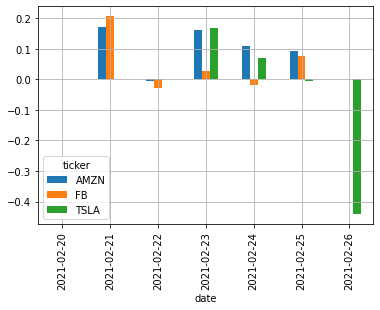

In [21]:
mean_df.plot(kind='bar')
plt.grid()